Notebook created by: Leshui He; Department of Economics, Bates College (for econ 260)

Import necessary packages.

In [1]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way.

In [2]:
p, pb, pk, y = symbols('p pb pk y')

# 1.1. Demand function and demand curve

## Define a demand function

Define a demand function:

In [3]:
# define linear demand function as in class notes
Qd = 171 - 20*p + 20*pb + 3*pk + 2*y
# show the defined function
Qd

Calculate derivative of the demand function with respect to $p$ by hand. 

$\LaTeX$ Note: 
* mark your inline LaTeX math expression with `$` at its beginning and the end
* the partial derivative sign in LaTeX math is: `\partial`
* the fraction in LaTeX math is: `\frac{numerator}{denominator}`

The derivative is: $\frac{\partial Q_d}{\partial p} = -20$

$\LaTeX$ Note:
* to type a centered equation (called math display) use `$$ (math here) $$`, for example:

$$\frac{\partial Q_d}{\partial p} = -20$$

$\LaTeX$ Note:
* to type multi-lined equations, use `\begin{align} and \end{align}` to surround your equations
* use `\\` for linebreak between each equation
* use `&`  on each line to tell LaTeX where you'd like the equations to align

\begin{align}
\frac{\partial Q_d}{\partial p} &= \frac{\partial}{\partial p} (171 - 20 p + 20 p_b + 3 p_k + 2 y) \\
  &= \frac{\partial}{\partial p} (171 + 20 p_b + 3 p_k + 2 y) + \frac{\partial}{\partial p}(-20 p) \\
  &= -20
\end{align}

\begin{align}
\frac{\partial Q_d}{\partial p} &= \frac{\partial}{\partial p} (171 - 20p + 20p_b + 3p_k + 2y) \\
&= \frac{\partial}{\partial p}(171 + 20 p_b + 3 p_k + 2y) + \frac{\partial}{\partial p} (-20p) \\
&= -20
\end{align}

Calculate derivative of the demand function with respect to $p$ using sympy

In [4]:
# Note: we have seen the use of diff() function in sympy, which requires two inputs
diff(Qd , p)

In [5]:
# Note: in sympy, you can calculate derivative of a sympy object using the "diff" method
#     it trails behind the object you want to take derivative of
#     you specify the variable you want to take derivative w.r.t. in the parenthsis
Qd.diff(p)

Understand a sympy function Rational()

In [6]:
x = 1/13
x*13

In [7]:
Rational(1,13)*13

Replace specific values into $p_b, p_k, y$, and call it Dcurve

In [8]:
# Notice the use of () and [] in the subs method in sympy
# Notice the use of funciton Rational()
Demand = Qd.subs([ (pb,4) , (pk,Rational(10,3)) , (y,Rational(25,2)) ])
Demand

## Plot the demand curve with the above specific values for $p_b, p_k, y$

Step 1: inverse the demand. 

Recall that the y-axis of the demand curve is p, not Qd! We need to inverse the Dcurve function first!

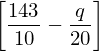

In [9]:
# define a new symbol q
q = symbols('q')
# solve the equation Demand = q, which is equivalent to (Demand - q) = 0. 
#   Notice how the syntax required by sympy takes equations without the equal sign.
#   Notice how the solution of sympy is stored in a list (with square brackets around it)
Dplot = solve(Demand - q, p)
Dplot

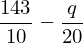

In [10]:
Dplot[0]

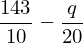

In [11]:
# retrieve the solution (p as a function of q) from the list
DInverseSimple = solve(Demand - q, p)[0]
DInverseSimple

Step 2: plot the (inverse) demand curve

In [12]:
# use plot function
plot(DInverseSimple, (q,0,286), xlabel="$q$", ylabel="$p$")

<Figure size 640x480 with 1 Axes>

## Plot the demand curve with $p_b, p_k, y$ explicitly substituted later on

Step 1: inverse the demand. 

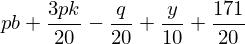

In [13]:
# define a new symbol q
q = symbols('q')
# solve the equation Demand = q, which is equivalent to (Demand - q) = 0. 
#   Notice how we solve for the equation and retrieve the first element of the list in one step
DInverse = solve(Qd - q, p)[0]
DInverse

Step 2: plot the demand curve

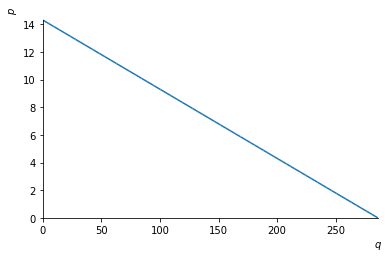

In [14]:
# use plot function
plot(DInverse.subs([(pb,4),(pk,Rational(10,3)),(y,Rational(25,2))]), (q,0,286), xlabel="$q$", ylabel="$p$")

# 1.2 Changes of other factors in the demand function

## 1.2.1 change in $p_b$

Take derivative of $Q_d$ with respect to $p_b$

In [15]:
Qd.diff(pb)

Q: what is the interpretation of this derivative?

A: for each dollar increase in $p_b$, $Q_d$ increases by $20$ units

Plot a demand curve with $p_b=5, p_k=3\frac{1}{3}, y=12.5$ explicitly substituted in.

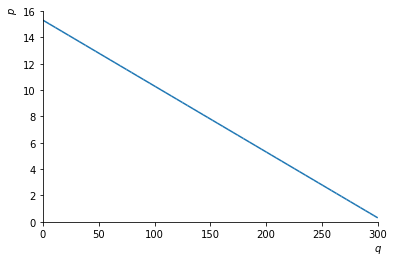

In [16]:
# use plot function
plot(DInverse.subs([(pb,5),(pk,Rational(10,3)),(y,Rational(25,2))]), (q,0,300), xlabel="$q$", ylabel="$p$")

### Useful trick for plots in sympy: store, hide and show plots

In [17]:
# plots can be stored as an object by itself too!
#    Notice we used option "show=False" to hide the plot for now
Dplot1 = plot(DInverse.subs([(pb,5),(pk,Rational(10,3)),(y,Rational(25,2))]), (q,0,300), xlabel="$q$", ylabel="$p$", show=False)

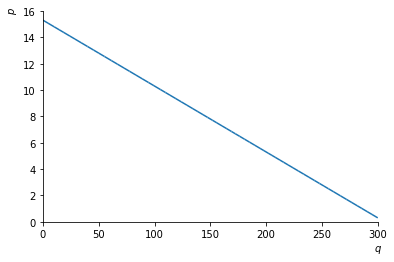

In [18]:
# show the plot when we need it
Dplot1.show()

### Compare demand curves

Plot two demand curves on the same graph, both with $p_k=3\frac{1}{3}, y=12.5$. 

Let the first demand curve with $p_b=4$, the second with $p_b = 5$.

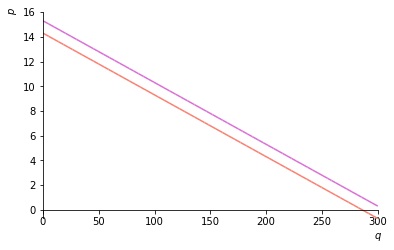

In [19]:
# create plots with different parameters
Dplot0 = plot(DInverse.subs([(pb,4),(pk,Rational(10,3)),(y,Rational(25,2))]), (q,0,300), xlabel="$q$", ylabel="$p$", show=False)
Dplot1 = plot(DInverse.subs([(pb,5),(pk,Rational(10,3)),(y,Rational(25,2))]), (q,0,300), xlabel="$q$", ylabel="$p$", show=False)

# combine plots into one plot
Dplot_combo = Dplot0
Dplot_combo.extend(Dplot1)

# assign colors for each line
Dplot_combo[0].line_color='salmon'
Dplot_combo[1].line_color='orchid'

# show plot
Dplot_combo.show()

# Questions and challenges

Q1: Add a 3rd demand curve to the graph above, similarly with $p_k=3\frac{1}{3}, y=12.5$, but $p_b=6$.

Make its color "blue".

In [20]:
# code here

Q2: Do all three demand curves have the same slope? Explain the reason behind it in terms of the demand function and its derivatives.

Write up your answer below in markdown.

(answer here)

Q3: 
* Is the gap between the first and second demand curves the same as the gap between the second and the third curves? 
* How much is the vertical distance between each two curves? 
* How much is the horizontal distance between each two curves? 

Explain the reason behind your observations in terms of the demand function and its derivatives.

Write up your answer below in markdown.

(answer here)

Q4: By hand

* calculate the derivative of the demand function with respect to $p_k$
* calculate the derivative of the demand function with respect to $y$

Write up your answer below in markdown.

(answer here)

Q5: Verify your answers using sympy

* calculate the derivative of the demand function with respect to $p_k$
* calculate the derivative of the demand function with respect to $y$

Write up your answer below in code.

In [21]:
# code here

Q6: What are the interpretations of each of the derivatives above? Interpret both their magnitudes and their signs. 

Write up your answer below in markdown.

(answer here)